<a href="https://colab.research.google.com/github/Jandsy/ml_finance_imperial/blob/main/Coursework/CourseWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<center>Machine Learning and Finance </center>**


## <center> CourseWork 2024 - StatArb </center>



In this coursework, you will delve into and replicate selected elements of the research detailed in the paper **[End-to-End Policy Learning of a Statistical Arbitrage Autoencoder Architecture](https://arxiv.org/pdf/2402.08233.pdf)**. **However, we will not reproduce the entire study.**

## Overview

This study redefines Statistical Arbitrage (StatArb) by combining Autoencoder architectures and policy learning to generate trading strategies. Traditionally, StatArb involves finding the mean of a synthetic asset through classical or PCA-based methods before developing a mean reversion strategy. However, this paper proposes a data-driven approach using an Autoencoder trained on US stock returns, integrated into a neural network representing portfolio trading policies to output portfolio allocations directly.


## Coursework Goal

This coursework will replicate these results, providing hands-on experience in implementing and evaluating this innovative end-to-end policy learning Autoencoder within financial trading strategies.

## Outline

- [Data Preparation and Exploration](#Data-Preparation-and-Exploration)
- [Fama French Analysis](#Fama-French-Analysis)
- [PCA Analysis](#PCA-Analysis)
- [Ornstein Uhlenbeck](#Ornstein-Uhlenbeck)
- [Autoencoder Analysis](#Autoencoder-Analysis)



**Description:**
The Coursework is graded on a 100 point scale and is divided into five  parts. Below is the mark distribution for each question:

| **Problem**  | **Question**          | **Number of Marks** |
|--------------|-----------------------|---------------------|
| **Part A**   | Question 1            | 4                   |
|              | Question 2            | 1                   |
|              | Question 3            | 3                   |
|              | Question 4            | 3                   |
|              | Question 5            | 1                   |
|              | Question 6            | 3                   |
|**Part  B**    | Question 7           | 1                   |
|              | Question 8            | 5                   |
|              | Question 9            | 4                   |
|              | Question 10           | 5                   |
|              | Question 11           | 2                   |
|              | Question 12           | 3                   |
|**Part  C**    | Question 13          | 3                   |
|              | Question 14           | 1                   |
|              | Question 15           | 3                   |
|              | Question 16           | 2                   |
|              | Question 17           | 7                   |
|              | Question 18           | 6                   |
|              | Question 19           | 3                   |
|  **Part  D** | Question 20           | 3                   |
|              | Question 21           | 5                   |
|              | Question 22           | 2                   |
|  **Part  E** | Question 23           | 2                   |
|              | Question 24           | 1                   |
|              | Question 25           | 3                   |
|              | Question 26           | 10                  |
|              | Question 27           | 1                   |
|              | Question 28           | 3                   |
|              | Question 29           | 3                   |
|              | Question 30           | 7                   |




Please read the questions carefully and do your best. Good luck!

## Objectives



## 1. Data Preparation and Exploration
Collect, clean, and prepare US stock return data for analysis.

## 2. Fama French Analysis
Utilize Fama French Factors to isolate the idiosyncratic components of stock returns, differentiating them from market-wide effects. This analysis helps in understanding the unique characteristics of individual stocks relative to broader market trends.

## 3. PCA Analysis
Employ Principal Component Analysis (PCA) to identify hidden structures and reduce dimensionality in the data. This method helps in extracting significant patterns that might be obscured in high-dimensional datasets.

## 4. Ornstein-Uhlenbeck Process
Analyze mean-reverting behavior in stock prices using the Ornstein-Uhlenbeck process. This stochastic process is useful for modeling and forecasting based on the assumption that prices will revert to a long-term mean.

## 5. Building a Basic Autoencoder Model
Construct and train a standard Autoencoder to extract residual idiosyncratic risk.








# Data Preparation and Exploration


---
<font color=green>Q1: (4 Marks)</font>
<br><font color='green'>
Write a Python function that accepts a URL parameter and retrieves the NASDAQ-100 companies and their ticker symbols by scraping the relevant Wikipedia page using **[Requests](https://pypi.org/project/requests/)** and **[BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)**. Your function should return the data as a list of tuples, with each tuple containing the company name and its ticker symbol. Then, call your function with the appropriate Wikipedia page URL and print the data in a 'Company: Ticker' format.

</font>

---


In [2]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [3]:
def get_nasdaq100_companies(url):
    '''
    This function takes the url of the wikipedia page of the NASDAQ-100 index
    and returns a list of tuples with the name and symbol of the companies in the index.

    '''
    response = requests.get(url) 
    soup = BeautifulSoup(response.content, 'html.parser') 
    table = soup.find('table', {'id': 'constituents'}) 
    rows = table.find_all('tr') 
    data = [] 
    for row in rows[1:]: # we iterate over the rows, skipping the first one
        cols = row.find_all('td') 
        data.append((cols[0].text.strip(), cols[1].text.strip()))
    return data

url = 'https://en.wikipedia.org/wiki/NASDAQ-100' # url of the wikipedia page
data = get_nasdaq100_companies(url)

df = pd.DataFrame(data, columns=['Name', 'Symbol']) # create a pandas dataframe
print(df)

                         Name Symbol
0                  Adobe Inc.   ADBE
1                         ADP    ADP
2                      Airbnb   ABNB
3     Alphabet Inc. (Class A)  GOOGL
4     Alphabet Inc. (Class C)   GOOG
..                        ...    ...
96   Walgreens Boots Alliance    WBA
97     Warner Bros. Discovery    WBD
98              Workday, Inc.   WDAY
99                Xcel Energy    XEL
100                   Zscaler     ZS

[101 rows x 2 columns]


---
<font color=green>Q2: (1 Mark)</font>
<br><font color='green'>
Given a list of tuples representing NASDAQ-100 companies (where each tuple contains a company name and its ticker symbol), write a Python script to extract all ticker symbols into a separate list called `tickers_list`.
</font>
---


In [4]:
tickers_list = df['Symbol'].tolist() # get the tickers list
print(tickers_list)

['ADBE', 'ADP', 'ABNB', 'GOOGL', 'GOOG', 'AMZN', 'AMD', 'AEP', 'AMGN', 'ADI', 'ANSS', 'AAPL', 'AMAT', 'ASML', 'AZN', 'TEAM', 'ADSK', 'BKR', 'BIIB', 'BKNG', 'AVGO', 'CDNS', 'CDW', 'CHTR', 'CTAS', 'CSCO', 'CCEP', 'CTSH', 'CMCSA', 'CEG', 'CPRT', 'CSGP', 'COST', 'CRWD', 'CSX', 'DDOG', 'DXCM', 'FANG', 'DLTR', 'DASH', 'EA', 'EXC', 'FAST', 'FTNT', 'GEHC', 'GILD', 'GFS', 'HON', 'IDXX', 'ILMN', 'INTC', 'INTU', 'ISRG', 'KDP', 'KLAC', 'KHC', 'LRCX', 'LIN', 'LULU', 'MAR', 'MRVL', 'MELI', 'META', 'MCHP', 'MU', 'MSFT', 'MRNA', 'MDLZ', 'MDB', 'MNST', 'NFLX', 'NVDA', 'NXPI', 'ORLY', 'ODFL', 'ON', 'PCAR', 'PANW', 'PAYX', 'PYPL', 'PDD', 'PEP', 'QCOM', 'REGN', 'ROP', 'ROST', 'SIRI', 'SBUX', 'SNPS', 'TTWO', 'TMUS', 'TSLA', 'TXN', 'TTD', 'VRSK', 'VRTX', 'WBA', 'WBD', 'WDAY', 'XEL', 'ZS']


---
<font color=green>Q3: (3 Marks)</font>
<br><font color='green'>
Using **[yfinance](https://pypi.org/project/yfinance/)** library, write a Python script that accepts a list of stock ticker symbols. For each symbol, download the adjusted closing price data, store it in a dictionary with the ticker symbol as the key, and then convert the final dictionary into a Pandas DataFrame. Handle any errors encountered during data retrieval by printing a message indicating which symbol failed
</font>
---

In [5]:
import yfinance as yf # import the yfinance library to get the stock data

def get_stock_data(tickers_list):
    '''
    This function gets the stock data for a list of tickers

    Parameters:
    tickers_list (list): list of stock tickers

    Returns:
    stock_data (dict): dictionary with the stock data
    '''
    stock_data = {}
    for ticker in tickers_list:
        try:
            stock = yf.Ticker(ticker)
            stock_data[ticker] = stock.history('20y')['Close']
        except:
            print(f'Failed to get data for {ticker}')
    return stock_data

stock_data = get_stock_data(tickers_list)
df = pd.DataFrame(stock_data) # we create a pandas dataframe with the stock data to make it easier to work with
print(df)

                                 ADBE         ADP        ABNB       GOOGL  \
Date                                                                        
2004-06-01 00:00:00-04:00   22.438295   21.908670         NaN         NaN   
2004-06-02 00:00:00-04:00   22.638105   21.858992         NaN         NaN   
2004-06-03 00:00:00-04:00   22.428310   22.057718         NaN         NaN   
2004-06-04 00:00:00-04:00   22.688055   22.067652         NaN         NaN   
2004-06-07 00:00:00-04:00   23.657120   22.350826         NaN         NaN   
...                               ...         ...         ...         ...   
2024-05-24 00:00:00-04:00  475.429993  248.899994  144.470001  174.990005   
2024-05-28 00:00:00-04:00  478.429993  243.300003  147.009995  176.399994   
2024-05-29 00:00:00-04:00  477.600006  240.089996  146.610001  175.899994   
2024-05-30 00:00:00-04:00  445.869995  240.910004  145.520004  172.110001   
2024-05-31 00:00:00-04:00  444.760010  244.919998  144.929993  172.500000   

---
<font color=green>Q4: (3 Marks)</font>
<br><font color='green'>
Write a Python script to analyze stock data stored in a dictionary `stock_data` (where each key is a stock ticker symbol, and each value is a Pandas Series of adjusted closing prices). The script should:
1. Convert the dictionary into a DataFrame.
2. Calculate the daily returns for each stock.
3. Identify columns (ticker symbols) with at least 2000 non-NaN values in their daily returns.
4. Create a new DataFrame that only includes these filtered ticker symbols.
5. Remove any remaining rows with NaN values in this new DataFrame.
</font>

---

In [6]:
# 1. Convert the dictionary into a DataFrame.
df = pd.DataFrame(stock_data)

# 2. Calculate the daily returns for each stock.
df_daily_returns = df.pct_change()

# 3. Identify columns (ticker symbols) with at least 2000 non-NaN values in their daily returns.
valid_columns = df_daily_returns.columns[df_daily_returns.notnull().sum() >= 2000]

# 4. Create a new DataFrame that only includes these filtered ticker symbols.
df_filtered = df_daily_returns[valid_columns]

# 5. Remove any remaining rows with NaN values in this new DataFrame.
df_filtered = df_filtered.dropna()

print(df_filtered) 
#df_filtered is the final DataFrame with the filtered ticker symbols and no NaN values

                               ADBE       ADP     GOOGL      GOOG      AMZN  \
Date                                                                          
2015-12-10 00:00:00-05:00 -0.006699  0.006003 -0.003292 -0.002861 -0.003715   
2015-12-11 00:00:00-05:00  0.027653 -0.024924 -0.012657 -0.014130 -0.033473   
2015-12-14 00:00:00-05:00  0.020127  0.015241  0.016151  0.012045  0.027744   
2015-12-15 00:00:00-05:00  0.008149  0.010284 -0.003213 -0.005844  0.001110   
2015-12-16 00:00:00-05:00  0.016380  0.008541  0.021708  0.019761  0.026008   
...                             ...       ...       ...       ...       ...   
2024-05-24 00:00:00-04:00 -0.016304 -0.010299  0.008297  0.007255 -0.001657   
2024-05-28 00:00:00-04:00  0.006310 -0.022499  0.008058  0.009584  0.007745   
2024-05-29 00:00:00-04:00 -0.001735 -0.013194 -0.002834 -0.003483 -0.000714   
2024-05-30 00:00:00-04:00 -0.066436  0.003415 -0.021546 -0.021646 -0.014834   
2024-05-31 00:00:00-04:00 -0.002489  0.016645  0.002

---
<font color=green>Q5: (1 Mark)</font>
<br><font color='green'>
Download the dataset named `df_filtered_nasdaq_100` from the GitHub repository of the course.
</font>

---

In [7]:
# we use github link to get the data
nasdaq100 = 'https://raw.githubusercontent.com/Jandsy/ml_finance_imperial/main/Coursework/df_filtered_nasdaq_100.csv'

# df_filtered_nasdaq_100 are the daily returns of the NASDAQ-100 index
df_filtered_nasdaq_100 = pd.read_csv(nasdaq100, index_col=0)
print(df_filtered_nasdaq_100)

                ADBE       ADP     GOOGL      GOOG      AMZN       AMD  \
Date                                                                     
2015-12-10 -0.006699  0.006004 -0.003292 -0.002861 -0.003715  0.042553   
2015-12-11  0.027653 -0.024924 -0.012657 -0.014130 -0.033473 -0.036735   
2015-12-14  0.020127  0.015241  0.016151  0.012045  0.027744 -0.008475   
2015-12-15  0.008149  0.010283 -0.003213 -0.005844  0.001110  0.008547   
2015-12-16  0.016380  0.008541  0.021708  0.019761  0.026008  0.076271   
...              ...       ...       ...       ...       ...       ...   
2024-05-06  0.015241  0.003514  0.005142  0.004971  0.013372  0.034396   
2024-05-07 -0.002674  0.009805  0.018739  0.018548  0.000318 -0.008666   
2024-05-08 -0.008471 -0.008894 -0.010920 -0.010521 -0.004026 -0.005245   
2024-05-09 -0.011166  0.009097  0.003424  0.002454  0.007979 -0.008007   
2024-05-10 -0.000746  0.006975 -0.007708 -0.007518 -0.010660 -0.003084   

                 AEP      AMGN       

---
<font color=green>Q6: (3 Marks) </font>
<br><font color='green'>
Conduct an in-depth analysis of the `df_filtered_nasdaq_100` dataset from GitHub. Answer the following questions:
- Which stock had the best performance over the entire period?
- What is the average daily return of 'AAPL'?
- What is the worst daily return? Provide the stock name and the date it occurred.
</font>

---

In [8]:
'''
which stock has the best performance over the entire period?
'''
# first we calculate the sum of the daily returns for each stock
stock_returns = df_filtered_nasdaq_100.sum()
# then we get the index of the stock with the highest sum
best_stock = stock_returns.idxmax() 

print(f'the stock with the best performance over the entire period is {best_stock}')

the stock with the best performance over the entire period is NVDA


The code Result indicate that NVDA (NVIDIA Corporation), has the best performance over the entire period from 2015 to 2024. This growth can be attributed to NVIDIA's strategic expansion into key markets such as gaming, data centers, artificial intelligence (AI), and autonomous vehicles. Specially with the AI technology trend worldwide, the company has significantly increased its revenue and profits. NVIDIA is leading innovations in GPU technology, which have become critical for AI research and applications. Additionally, the high demand for high performance computing and graphic processing has enhanced NVIDIA’s market position, which increased stock appreciation.

In [9]:
'''
What is the average daily return of 'AAPL'?
'''
average_daily_return = df_filtered_nasdaq_100['AAPL'].mean()
print(f'The average daily return for AAPL is :', average_daily_return)

The average daily return for AAPL is : 0.0010849409515136207


The average daily return for AAPL, Apple Inc., is 0.001085, which reflect its consistent performance and steady growth over the period (2015-2024). This period has seen Apple continuously innovate and expand its product lineup with successful launches like the iPhone, iPad, and Apple Watch, alongside growing services revenue from the App Store, Apple Music, and iCloud. However, what makes apple apple stock return positive is investors believes on Apple's strong brand loyalty, which makes alot of consumers uses apple as first brand product. Also, Apple has efficient supply chain management, and strategic entry into new markets such as wearables and financial services have contributed to its stable returns and robust financial health.

In [10]:
'''
What is the worst daily return? Provide the stock name and the date it occurred.

'''
# first we get the worst daily return
worst_daily_return = df_filtered_nasdaq_100.min().min()
# then we get the date of the worst daily return
worst_daily_return_date = df_filtered_nasdaq_100.stack()[df_filtered_nasdaq_100.stack() == worst_daily_return].index[0] # stack method is used to convert the dataframe into a series and then we get the index of the worst daily return
stock = worst_daily_return_date[1]
stock_name = yf.Ticker(stock).info['longName']
print(f'The worst daily return is {worst_daily_return} and it occurred on {worst_daily_return_date[0]} for {stock} ({stock_name})')

HTTPError: 404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v6/finance/quoteSummary/FANG?modules=financialData&modules=quoteType&modules=defaultKeyStatistics&modules=assetProfile&modules=summaryDetail&ssl=true

The worst daily return is -0.4464579394678258, which occurred on 2020-03-09 for FANG (Diamondback Energy, Inc.). This significant drop occurs because of the broader market crash in March 2020. The reason of the market crash was the COVID-19 pandemic lockdowns which caused a sharp decline in oil prices and impacted the energy sector. Diamondback Energy heavily involved in the oil and gas industry, which faced intense pressure as demand plummeted and prices fell, leading to a significant decline in its stock value on that day.

# Fama French Analysis

The Fama-French five-factor model is an extension of the classic three-factor model used in finance to describe stock returns. It is designed to better capture the risk associated with stocks and explain differences in returns. This model includes the following factors:

1. **Market Risk (MKT)**: The excess return of the market over the risk-free rate. It captures the overall market's premium.
2. **Size (SMB, "Small Minus Big")**: The performance of small-cap stocks relative to large-cap stocks.
3. **Value (HML, "High Minus Low")**: The performance of stocks with high book-to-market values relative to those with low book-to-market values.
4. **Profitability (RMW, "Robust Minus Weak")**: The difference in returns between companies with robust (high) and weak (low) profitability.
5. **Investment (CMA, "Conservative Minus Aggressive")**: The difference in returns between companies that invest conservatively and those that invest aggressively.

## Additional Factor

6. **Momentum (MOM)**: This factor represents the tendency of stocks that have performed well in the past to continue performing well, and the reverse for stocks that have performed poorly.

### Mathematical Representation

The return of a stock $R_i^t$ at time $t$ can be modeled as follows :

$$
R_i^t - R_f^t = \alpha_i^t + \beta_{i,MKT}^t(R_M^t - R_f^t) + \beta_{i,SMB}^t \cdot SMB^t + \beta_{i,HML}^t \cdot HML^t + \beta_{i,RMW}^t \cdot RMW^t + \beta_{i,CMA}^t \cdot CMA^t + \beta_{i,MOM}^t \cdot MOM^t + \epsilon_i^t
$$

Where:
- $ R_i^t $ is the return of stock $i$ at time $t$
- $R_f^t $is the risk-free rate at time $t$
- $ R_M^t $ is the market return at time $t$
- $\alpha_i^t $ is the abnormal return or alpha of stock $ i $ at time $t$
- $\beta^t $ coefficients represent the sensitivity of the stock returns to each factor at time $t$
- $\epsilon_i^t $ is the error term or idiosyncratic risk unique to stock $ i $ at time $t$

This model is particularly useful for identifying which factors significantly impact stock returns and for constructing a diversified portfolio that is optimized for given risk preferences.




---
<font color=green>Q7: (1 Mark) </font>
<br><font color='green'>
Download the `fama_french_dataset` from the course's GitHub account.
</font>

---

In [11]:
# we download the Fama-French dataset from github
fama_french_dataset = 'https://raw.githubusercontent.com/Jandsy/ml_finance_imperial/main/Coursework/fama_french_dataset.csv'
df_fama_french = pd.read_csv(fama_french_dataset, index_col=0)
print(df_fama_french)

            Mkt-RF   SMB   HML   RMW   CMA     RF   Mom
1963-07-01   -0.67  0.02 -0.35  0.03  0.13  0.012 -0.21
1963-07-02    0.79 -0.28  0.28 -0.08 -0.21  0.012  0.42
1963-07-03    0.63 -0.18 -0.10  0.13 -0.25  0.012  0.41
1963-07-05    0.40  0.09 -0.28  0.07 -0.30  0.012  0.07
1963-07-08   -0.63  0.07 -0.20 -0.27  0.06  0.012 -0.45
...            ...   ...   ...   ...   ...    ...   ...
2024-03-22   -0.23 -0.98 -0.53  0.29 -0.37  0.021  0.43
2024-03-25   -0.26 -0.10  0.88 -0.22 -0.17  0.021 -0.34
2024-03-26   -0.26  0.10 -0.13 -0.50  0.23  0.021  0.09
2024-03-27    0.88  1.29  0.91 -0.14  0.58  0.021 -1.34
2024-03-28    0.10  0.45  0.48 -0.07  0.09  0.021 -0.44

[15290 rows x 7 columns]


---
<font color=green>Q8: (5 Marks)</font>
<br><font color='green'>

Write a Python function called `get_sub_df_ticker(ticker, date, df_filtered, length_history)` that extracts a historical sub-dataframe for a given `ticker` from `df_filtered`. The function should use `length_history` to determine the number of trading days to include, ending at the specified `date`. Return the sub-dataframe for the specified `ticker`.
</font>

---


In [12]:
def get_sub_df_ticker(ticker, date, df_filtered, length_history):
    """
    Extract a subset of data for a specific ticker within a defined date range.

    Parameters:
    ticker (str): The ticker symbol to filter.
    date (str or pd.Timestamp): The end date for the data subset.
    df_filtered (pd.DataFrame): The DataFrame containing the stock data.
    length_history (int): The length of the history to look back in years.

    Returns:
    pd.DataFrame: The subset of the DataFrame containing the specified ticker's data.
    """
    # Convert the end date to a pandas Timestamp
    end_date = pd.to_datetime(date)
    
    # Ensure the DataFrame index is in datetime format
    if not pd.api.types.is_datetime64_any_dtype(df_filtered.index):
        df_filtered.index = pd.to_datetime(df_filtered.index)

    # Calculate the start date by subtracting the length of history from the end date
    start_date = end_date - pd.DateOffset(years=length_history)

    # Ensure the date range exists within the DataFrame index
    if start_date < df_filtered.index.min():
        start_date = df_filtered.index.min()
    if end_date > df_filtered.index.max():
        end_date = df_filtered.index.max()

    # Ensure the ticker exists in the DataFrame columns
    if ticker not in df_filtered.columns:
        raise ValueError(f"Ticker '{ticker}' not found in the DataFrame columns")

    # Extract the subset of data within the date range for the specified ticker
    sub_df = df_filtered.loc[start_date:end_date, [ticker]]

    return sub_df

In [13]:
# test the function using the 'AAPL' ticker
sub_df = get_sub_df_ticker('AAPL', '2021-01-01', df_filtered_nasdaq_100, 5)
print(sub_df)

                AAPL
Date                
2016-01-04  0.000855
2016-01-05 -0.025059
2016-01-06 -0.019570
2016-01-07 -0.042205
2016-01-08  0.005288
...              ...
2020-12-24  0.007712
2020-12-28  0.035766
2020-12-29 -0.013315
2020-12-30 -0.008527
2020-12-31 -0.007703

[1259 rows x 1 columns]


---
<font color=green>Q9: (4 Marks)</font>
<br><font color='green'>
Create a Python function named `df_ticker_with_fama_french(ticker, date, df_filtered, length_history, fama_french_data)` that uses `get_sub_df_ticker` to extract historical data for a specific `ticker`. Incorporate the Fama-French factors from `fama_french_data` into the extracted sub-dataframe. Adjust the ticker's returns by subtracting the risk-free rate ('RF') and add other relevant Fama-French factors ('Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', and 'Mom'). Return the resulting sub-dataframe.
</font>

---

In [14]:
def df_ticker_with_fama_french(ticker, date, df_filtered, length_history, fama_french_data):
    """
    Integrate Fama-French data with the stock data for a specific ticker.

    Parameters:
    ticker (str): The ticker symbol to filter.
    date (str or pd.Timestamp): The end date for the data subset.
    df_filtered (pd.DataFrame): The DataFrame containing the stock data.
    length_history (int): The length of the history to look back in years.
    fama_french_data (pd.DataFrame): The DataFrame containing Fama-French factors.

    Returns:
    pd.DataFrame: The combined DataFrame with adjusted returns and Fama-French factors.
    """
    # Get the subset of the data for the specified ticker
    sub_df = get_sub_df_ticker(ticker, date, df_filtered, length_history)

    # Ensure Fama-French data index is in datetime format
    if not pd.api.types.is_datetime64_any_dtype(fama_french_data.index):
        fama_french_data.index = pd.to_datetime(fama_french_data.index)

    # Join the Fama-French data with the stock data
    sub_df = sub_df.join(fama_french_data, how='inner')

    # Adjusting the returns by subtracting the risk-free rate
    sub_df['Adj_Return'] = sub_df[ticker] - sub_df['RF']

    # Add other relevant Fama-French factors
    factors = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'Mom']
    for factor in factors:
        if factor in fama_french_data.columns:
            sub_df[factor] = sub_df[factor]

    return sub_df

In [15]:
# test the fama_french function using the 'AAPL' ticker
sub_df_fama_french = df_ticker_with_fama_french('AAPL', '2021-01-01', df_filtered_nasdaq_100, 5, df_fama_french)
sub_df_fama_french

,AAPL,Mkt-RF,SMB,HML,RMW,CMA,RF,Mom,Adj_Return
2016-01-04,0.000855,-1.59,-0.76,0.52,0.35,0.42,0.0,-1.93,0.000855
2016-01-05,-0.025059,0.12,-0.24,0.01,0.05,0.31,0.0,0.67,-0.025059
2016-01-06,-0.019570,-1.35,-0.23,0.00,0.15,0.04,0.0,1.92,-0.019570
2016-01-07,-0.042205,-2.44,-0.29,0.08,0.49,0.36,0.0,0.86,-0.042205
2016-01-08,0.005288,-1.11,-0.52,-0.03,0.25,0.05,0.0,-0.11,0.005288
...,...,...,...,...,...,...,...,...,...
2020-12-24,0.007712,0.21,-0.44,-0.19,0.25,-0.07,0.0,0.20,0.007712
2020-12-28,0.035766,0.46,-0.68,0.36,1.39,0.46,0.0,-0.47,0.035766
2020-12-29,-0.013315,-0.40,-1.42,0.24,0.78,-0.29,0.0,-0.41,-0.013315
2020-12-30,-0.008527,0.27,1.06,0.03,-0.65,-0.05,0.0,-0.27,-0.008527


---
<font color=green>Q10: (5 Marks) </font>
<br><font color='green'>
Write a Python function named `extract_beta_fama_french` to perform a rolling regression analysis for a given stock at a specific time point using the Fama-French model. The function should accept the following parameters:

- `ticker`: A string indicating the stock symbol.
- `date`: A string specifying the date for the analysis.
- `length_history`: An integer representing the number of days of historical data to include.
- `df_filtered`: A pandas DataFrame (assumed to be derived from question 5) containing filtered stock data.
- `fama_french_data`: A pandas DataFrame (assumed to be from question 7) that includes Fama-French factors.

Utilize the `statsmodels.api` library to conduct the regression.
</font>

---

In [16]:
import statsmodels.api as sm
def extract_beta_fama_french(ticker, date, length_history, df_filtered, fama_french_data):
    """
    Perform a rolling regression analysis for a given stock at a specific time point using the Fama-French model.

    Parameters:
    ticker (str): A string indicating the stock symbol.
    date (str): A string specifying the date for the analysis.
    length_history (int): An integer representing the number of days of historical data to include.
    df_filtered (pd.DataFrame): A pandas DataFrame containing filtered stock data.
    fama_french_data (pd.DataFrame): A pandas DataFrame that includes Fama-French factors.

    Returns:
    Regression results of the Fama-French model.
    """
    # Integrate Fama-French data with the stock data
    df_combined = df_ticker_with_fama_french(ticker, date, df_filtered, length_history, fama_french_data)

    # Define the independent variables (Fama-French factors)
    X = df_combined[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'Mom']]
    X = sm.add_constant(X)  # Add a constant term to the model

    # Define the dependent variable (adjusted returns)
    y = df_combined['Adj_Return']

    # Perform the regression
    model = sm.OLS(y, X).fit()

    return model

---
<font color=green>Q11: (2 Marks) </font>
<br><font color='green'>
Apply the `extract_beta_fama_french` function to the stock symbol 'AAPL' for the date '2024-03-28', using a historical data length of 252 days. Ensure that the `df_filtered` and `fama_french_data` DataFrames are correctly prepared and available in your environment before executing this function. The parameters for the function call are set as follows:

- **Ticker**: 'AAPL'
- **Date**: '2024-03-28'
- **Length of History**: 252 days
</font>

---



In [17]:
# Extract the beta using the Fama-French model
APPL_beta = extract_beta_fama_french('AAPL', '2024-03-28', 252, df_filtered_nasdaq_100, df_fama_french)

---
<font color=green>Q12: (2 Marks)</font>
<br><font color='green'>
Once the `extract_beta_fama_french` function has been applied to 'AAPL' with the specified parameters, the next step is to analyze the regression summary to identify which Fama-French factor explains the most variance in 'AAPL' returns during the specified period.

Follow these steps to perform the analysis:

1. **Review the Summary**: Examine the regression output, focusing on the coefficients and their statistical significance (p-values).
2. **Identify Key Factor**: Determine which factor has the highest absolute coefficient value and is statistically significant (typically p < 0.05). This factor can be considered as having the strongest influence on 'AAPL' returns for the period.

</font>

---

In [18]:
'''
1. Review the Summary: Examine the regression output, focusing on the coefficients and their statistical significance (p-values).
2. Identify Key Factor: Determine which factor has the highest absolute coefficient value and is statistically significant (typically p < 0.05).
 This factor can be considered as having the strongest influence on 'AAPL' returns for the period.
'''
print(APPL_beta.summary())

#identify the key factor
key_factor = APPL_beta.params.abs().idxmax() # this line will return the key factor with the highest absolute coefficient value
print(f'The key factor with the highest absolute coefficient value is {key_factor}')

                            OLS Regression Results                            
Dep. Variable:             Adj_Return   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     466.2
Date:                Sat, 01 Jun 2024   Prob (F-statistic):               0.00
Time:                        09:24:00   Log-Likelihood:                 6133.5
No. Observations:                2088   AIC:                        -1.225e+04
Df Residuals:                    2081   BIC:                        -1.221e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0059      0.000    -20.877      0.0

**Write your answers here:**

t is very important to note that the OLS regression output contains various metrics and coefficients of the factors. The R-squared is 0.573, which means that the model explaining approximately 57.3% of variation in ‘AAPL’ returns. Adjusted R-squared is 0.572, which is similar to the R-squared and accounts for the number of predictors in the model. Another metrics we consider is F-statistic which was about 466.2 and p-value (0.00) meaning that the model is significant.

In terms of Coefficient and Statistical Significance Here are the coefficients and p-values for each factor:

const: -0.0059, p < 0.0001

Mkt-RF: 0.0127, p < 0.0001

SMB: -0.0014, p = 0.004

HML: -0.0061, p < 0.0001

RMW: 0.0047, p < 0.0001

CMA: 0.0052, p < .0001

Mom: (not significant), (p = .415)

Identify Key Factor

We can focus on absolute values of coefficients and their significant levels to help us determine which factor has greatest impact within our data set; this approach will enable us to identify the influence such factors have upon other economic variables like interest rates or inflation rate among others or even any one particular variable considered when making decisions based on analytical study carried out over long period spanning several years covering various industries around globe i.e., what were some key determinants driving performance across sectors during last decade? Those with small P-values (<5%) include:

Mkt-RF : .0127

SMB : -.0014

HML : -.0061

RMW : .0047

CMA : .0052

Among these, the factor with the highest absolute coefficient value is Mkt-RF with a coefficient of 0.0127, which is also statistically significant (p < 0.0001).

Conclusion The most powerful factor is Mkt-RF (market excess return) and it has the biggest absolute coefficient value among all other factors, this suggests that it explains more variability in ‘AAPL’ returns over t

# PCA Analysis


In literature, another method exists for extracting residuals for each stock, utilizing the PCA approach to identify hidden factors in the data. Let's describe this method.

The return of a stock $R_i^t$ at time $t$ can be modeled as follows :

$$
R_i^t  = \sum_{j=1}^m\beta_{i,j}^t F_j^t  + \epsilon_i^t
$$

Where:
- $ R_i^t $ is the return of stock $i$ at time $t$
- $m$ is the number of factors selected from PCA
-  $ F_j^t $ is the $j$-th hidden factor constructed from PCA at time $t$
- $\beta_{i,j}^t $ are the coefficients representing the sensitivity of the stock returns to each hidden factor.
- $\epsilon_i^t $  is the residual term for stock $i$ at time $t$, representing the portion of the return not explained by the PCA factors.

### Representation of Stock Return Data

Consider the return data for $N$ stocks over $T$ periods, represented by the matrix $R$ of size $T \times N$:

$$
R = \left[
\begin{array}{cccc}
R_1^T & R_2^T & \cdots & R_N^T \\
R_1^{T-1} & R_2^{T-1} & \cdots & R_N^{T-1} \\
\vdots & \vdots & \ddots & \vdots \\
R_1^1 & R_2^1 & \cdots & R_N^1 \\
\end{array}
\right]
$$

Each element $R_i^k$ of the matrix represents the return of stock $i$ at time $k$ and is defined as:

$$
R_i^k = \frac{S_{i,k} - S_{i, k-1}}{S_{i, k-1}}, \quad k=1,\cdots, T, \quad i=1,\cdots,N
$$

where $S_{i,k}$ denotes the adjusted close price of stock $i$ at time $k$.

### Standardization of Returns

To adjust for varying volatilities across stocks, we standardize the returns as follows:

$$
Z_i^t = \frac{R_i^t - \mu_i}{\sigma_i}
$$

where $\mu_i$ and $\sigma_i$ are the mean and standard deviation of returns for stock $i$ over the period $[t-T, t]$, respectively.

### Empirical Correlation Matrix

The empirical correlation matrix $C$ is computed from the standardized returns:

$$
C = \frac{1}{T-1} Z^T Z
$$

where $Z^T$ is the transpose of matrix $Z$.

### Singular Value Decomposition (SVD)

We apply Singular Value Decomposition to the correlation matrix $C$:

$$
C = U \Sigma V^T
$$

Here, $U$ and $V$ are orthogonal matrices representing the left and right singular vectors, respectively, and $\Sigma$ is a diagonal matrix containing the singular values, which are the square roots of the eigenvalues.

### Construction of Hidden Factors

For each of the top $m$ components, we construct the selected hidden factors as follows:

$$
F_j^t = \sum_{i=1}^N \frac{\lambda_{i,j}}{\sigma_i} R_i^t
$$

where $\lambda_{i,j}$ is the $i$-th component of the $j$-th eigenvector (ranked by eigenvalue magnitude).


---
<font color=green>Q13 (3 Marks):

For the specified period from March 29, 2023 ('2023-03-29'), to March 28, 2024 ('2024-03-28'), generate the matrix $Z$ by standardizing the stock returns using the DataFrame `df_filtered_new`
</font>

---


In [19]:
## Insert your code here
start_date = '2023-03-29' # Start Date for Filtering Data
end_date = '2024-03-28' # End Date for Filtering Data
df_filtered_new = df_filtered.loc[start_date: end_date] # Put Filter Data into a New DataFrame
print(f"The DataFrame's First Date is {df_filtered_new.index[0]}, and Last Date is {df_filtered_new.index[-1]}") # Sanity Check
Z = (df_filtered_new - df_filtered_new.mean()) / df_filtered_new.std() # Create Z Matrix
Z.head() # Display Z Matrix

The DataFrame's First Date is 2023-03-29 00:00:00-04:00, and Last Date is 2024-03-28 00:00:00-04:00


,ADBE,ADP,GOOGL,GOOG,AMZN,AMD,AEP,AMGN,ADI,ANSS,...,TTWO,TMUS,TSLA,TXN,VRSK,VRTX,WBA,WBD,WDAY,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2023-03-29 00:00:00-04:00,0.658925,2.189521,0.106285,0.207821,1.503570,0.444433,1.020469,0.727394,1.860839,0.356414,...,0.517876,0.615256,0.814986,1.344644,1.105776,0.127319,0.497108,0.429736,2.277783,1.269715
2023-03-30 00:00:00-04:00,0.273051,-0.221312,-0.389329,-0.434766,0.787034,0.526996,0.277318,0.076722,1.630406,0.936497,...,-0.109884,0.439952,0.233493,1.187062,0.239468,-0.525980,0.691244,0.446100,0.389915,0.430698
2023-03-31 00:00:00-04:00,0.360570,1.136314,1.540732,1.439604,0.531735,-0.056439,0.475348,0.008638,0.935420,1.044069,...,1.337544,0.117644,2.058867,0.640236,0.325258,0.538943,-0.008810,0.565842,1.611597,0.597545
2023-04-03 00:00:00-04:00,-0.713053,-2.259597,0.252735,0.407399,-0.591892,-0.600163,-0.086831,0.759726,-0.328373,-0.555499,...,-0.377687,1.191795,-2.030038,-0.684866,-0.214467,0.183344,1.205794,-0.547975,-0.634285,0.121519
2023-04-04 00:00:00-04:00,0.560730,-1.137418,0.099652,0.013877,0.658632,-0.342217,0.223115,0.872407,-0.399698,-0.127907,...,1.434972,-0.347703,-0.377655,-1.394525,-0.538698,-0.487155,0.553147,0.755053,-0.537767,1.011205


---
<font color=green>Q14: (1 Mark) </font>
<br><font color='green'>
Download the `Z_matrix` matrix from the course's GitHub account.
</font>

---

In [20]:
## Insert your code here
# Get Z Matrix via GitHub Path
Z_matrix_github_path = r"https://raw.githubusercontent.com/Jandsy/ml_finance_imperial/main/Coursework/Z_matrix.csv"
Z_matrix = pd.read_csv(Z_matrix_github_path, index_col=0)
Z_matrix.head()

,ADBE,ADP,GOOGL,GOOG,AMZN,AMD,AEP,AMGN,ADI,ANSS,...,TTWO,TMUS,TSLA,TXN,VRSK,VRTX,WBA,WBD,WDAY,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2023-03-29,0.658925,2.189521,0.106285,0.207821,1.503570,0.444433,1.020467,0.727398,1.860839,0.356414,...,0.517876,0.615242,0.814986,1.344650,1.105776,0.127319,0.497115,0.429736,2.277783,1.269711
2023-03-30,0.273051,-0.221306,-0.389329,-0.434766,0.787034,0.526996,0.277291,0.076716,1.630406,0.936497,...,-0.109884,0.439972,0.233493,1.187056,0.239468,-0.525980,0.691243,0.446100,0.389915,0.430715
2023-03-31,0.360570,1.136308,1.540732,1.439604,0.531735,-0.056439,0.475365,0.008639,0.935425,1.044069,...,1.337544,0.117646,2.058867,0.640237,0.325258,0.538943,-0.008816,0.565842,1.611597,0.597545
2023-04-03,-0.713053,-2.259591,0.252735,0.407399,-0.591892,-0.600163,-0.086824,0.759731,-0.328378,-0.555499,...,-0.377687,1.191774,-2.030038,-0.684867,-0.214460,0.183344,1.205798,-0.547975,-0.634285,0.121519
2023-04-04,0.560730,-1.137430,0.099652,0.013877,0.658632,-0.342217,0.223111,0.872403,-0.399698,-0.127907,...,1.434972,-0.347689,-0.377655,-1.394525,-0.538698,-0.487155,0.553153,0.755053,-0.537767,1.011197


Z_Matrix via GitHub matches the Z Matrix created earlier manually via standardization. This confirms that the Z Matrix in Q13 was calculated correctly. 

---
<font color=green>Q15: (3 Marks) </font>
<br><font color='green'>
For the specified period from March 29, 2023 ('2023-03-29'), to March 28, 2024 ('2024-03-28'), compute the correlation matrix
$C$ using the matrix `Z_matrix`.
</font>

---

In [21]:
## Insert your code here
T = len(Z_matrix) # Length of Z Matrix
C_formula = (1/(T - 1)) * Z_matrix.T @ Z_matrix # Create Empirical Correlation Matrix
C_formula

,ADBE,ADP,GOOGL,GOOG,AMZN,AMD,AEP,AMGN,ADI,ANSS,...,TTWO,TMUS,TSLA,TXN,VRSK,VRTX,WBA,WBD,WDAY,XEL
ADBE,1.000000,0.218513,0.397890,0.400601,0.463488,0.444032,-0.035967,0.198781,0.321991,0.387483,...,0.257931,0.102167,0.268863,0.326597,0.171580,0.164760,0.033955,0.099841,0.418110,0.019105
ADP,0.218513,1.000000,0.294213,0.298841,0.168206,0.045884,0.228457,0.214813,0.279607,0.238355,...,0.290311,0.113985,0.178128,0.297954,0.325258,0.176771,0.142369,0.243986,0.320836,0.164682
GOOGL,0.397890,0.294213,1.000000,0.997415,0.521199,0.371105,-0.006803,0.118938,0.222252,0.292286,...,0.238219,0.086673,0.267941,0.192188,0.178622,0.142447,0.052710,0.042072,0.289137,0.025701
GOOG,0.400601,0.298841,0.997415,1.000000,0.525626,0.371568,-0.004037,0.118296,0.223710,0.294542,...,0.242111,0.091456,0.268114,0.198044,0.180110,0.146190,0.060822,0.045516,0.293575,0.026392
AMZN,0.463488,0.168206,0.521199,0.525626,1.000000,0.463049,-0.010849,0.123745,0.290872,0.342042,...,0.222346,0.120301,0.303368,0.299500,0.144325,0.104962,0.017926,0.162937,0.403757,-0.058870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VRTX,0.164760,0.176771,0.142447,0.146190,0.104962,0.039540,0.239861,0.281759,0.110189,0.142121,...,0.180810,0.139184,0.144443,0.198258,0.251863,1.000000,0.159124,0.062726,0.101851,0.184369
WBA,0.033955,0.142369,0.052710,0.060822,0.017926,0.002629,0.309717,0.214701,0.208907,0.096813,...,0.115189,0.063538,0.168495,0.199627,0.038371,0.159124,1.000000,0.361533,0.010855,0.194839
WBD,0.099841,0.243986,0.042072,0.045516,0.162937,0.092733,0.325463,0.220342,0.310681,0.095919,...,0.129023,0.084315,0.282265,0.355450,0.002990,0.062726,0.361533,1.000000,0.160860,0.183837
WDAY,0.418110,0.320836,0.289137,0.293575,0.403757,0.334587,0.017659,0.068097,0.315426,0.382360,...,0.293949,0.142648,0.277744,0.346161,0.195588,0.101851,0.010855,0.160860,1.000000,-0.019310


---
<font color=green>Q16: (2 Marks) </font>
<br><font color='green'>
Refind the correlation matrix from the from March 29, 2023 ('2023-03-29'), to March 28, 2024 ('2024-03-28') using pandas correlation matrix method.
</font>

---

In [22]:
## Insert your code here
C = Z_matrix.corr()
C

,ADBE,ADP,GOOGL,GOOG,AMZN,AMD,AEP,AMGN,ADI,ANSS,...,TTWO,TMUS,TSLA,TXN,VRSK,VRTX,WBA,WBD,WDAY,XEL
ADBE,1.000000,0.218513,0.397890,0.400601,0.463488,0.444032,-0.035967,0.198781,0.321991,0.387483,...,0.257931,0.102167,0.268863,0.326597,0.171580,0.164760,0.033955,0.099841,0.418110,0.019105
ADP,0.218513,1.000000,0.294213,0.298841,0.168206,0.045884,0.228457,0.214813,0.279607,0.238355,...,0.290311,0.113985,0.178128,0.297954,0.325258,0.176771,0.142369,0.243986,0.320836,0.164682
GOOGL,0.397890,0.294213,1.000000,0.997415,0.521199,0.371105,-0.006803,0.118938,0.222252,0.292286,...,0.238219,0.086673,0.267941,0.192188,0.178622,0.142447,0.052710,0.042072,0.289137,0.025701
GOOG,0.400601,0.298841,0.997415,1.000000,0.525626,0.371568,-0.004037,0.118296,0.223710,0.294542,...,0.242111,0.091456,0.268114,0.198044,0.180110,0.146190,0.060822,0.045516,0.293575,0.026392
AMZN,0.463488,0.168206,0.521199,0.525626,1.000000,0.463049,-0.010849,0.123745,0.290872,0.342042,...,0.222346,0.120301,0.303368,0.299500,0.144325,0.104962,0.017926,0.162937,0.403757,-0.058870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VRTX,0.164760,0.176771,0.142447,0.146190,0.104962,0.039540,0.239861,0.281759,0.110189,0.142121,...,0.180810,0.139184,0.144443,0.198258,0.251863,1.000000,0.159124,0.062726,0.101851,0.184369
WBA,0.033955,0.142369,0.052710,0.060822,0.017926,0.002629,0.309717,0.214701,0.208907,0.096813,...,0.115189,0.063538,0.168495,0.199627,0.038371,0.159124,1.000000,0.361533,0.010855,0.194839
WBD,0.099841,0.243986,0.042072,0.045516,0.162937,0.092733,0.325463,0.220342,0.310681,0.095919,...,0.129023,0.084315,0.282265,0.355450,0.002990,0.062726,0.361533,1.000000,0.160860,0.183837
WDAY,0.418110,0.320836,0.289137,0.293575,0.403757,0.334587,0.017659,0.068097,0.315426,0.382360,...,0.293949,0.142648,0.277744,0.346161,0.195588,0.101851,0.010855,0.160860,1.000000,-0.019310


The Values in the Empirical Correlation Matrix calculated via the Formula and via Pandas inherent method match, validating that the Correlation Matrix created via the Formula is correct. 

---
<font color=green>Q17: (7 Marks) </font>
<br><font color='green'>
Conduct Singular Value Decomposition on the correlation matrix $C$. Follow these steps:


1.   **Perform SVD**: Decompose the matrix $C$ into its singular values and vectors.
2.   **Rank Eigenvalues**: Sort the resulting singular values (often squared to compare to eigenvalues) in descending order.
3. **Select Components**: Extract the first 20 components based on the largest singular values.
4. **Variance Explained**: Print the variance explained by the first 20 Components and dimensions of differents matrix that you created.

</font>

---

In [35]:
## Insert your code here
# Performing SVD
U, S, Vt = np.linalg.svd(C)

In [36]:
# Ranking the Eigenvalues
singular_values_squared = S**2 # Square the eigenvalues for comparison
sorted_indices = np.argsort(singular_values_squared)[::-1] # Store the indices in Descending Order
sorted_singular_values = singular_values_squared[sorted_indices] # Store the Singular Values in Descending Order

# Select Top 20 Components
top_20_components = sorted_singular_values[:20] # Use Slicing to select top 20 components

# Variance Expained
variance_explained = top_20_components / np.sum(singular_values_squared)

# Printing results
print("Variance explained by the first 20 components:")
print(variance_explained)

# Printing dimensions of different matrices
print("\nDimensions of U matrix:", U.shape)
print("Dimensions of singular values vector (S):", S.shape)
print("Dimensions of Vt matrix:", Vt.shape)

Variance explained by the first 20 components:
[0.78617886 0.0864855  0.02462599 0.01223756 0.01065625 0.00673085
 0.00554871 0.00498553 0.00486848 0.00417346 0.00369662 0.00336624
 0.00315847 0.00281594 0.0025195  0.00228393 0.00220505 0.00211658
 0.00191477 0.00185626]

Dimensions of U matrix: (89, 89)
Dimensions of singular values vector (S): (89,)
Dimensions of Vt matrix: (89, 89)


In [53]:
cumulative_variance_explained = np.sum(variance_explained)
print(f"The above result seems reasonable as the Variance Explained by the First Principle Component is:")
print(f"{np.round(variance_explained[0], 4) * 100}%")
print(f"The cumulative variance explained by top 20 Principle Components is:")
print(f"{np.round(cumulative_variance_explained, 3) * 100} %")

The above result seems reasonable as the Variance Explained by the First Principle Component is:
78.62%
The cumulative variance explained by top 20 Principle Components is:
97.2 %


---
<font color=green>Q18: (6 Marks) </font>
<br><font color='green'>
Extract the 20 hidden factors in a matrix F. Check that shape of F is $(252,20)$
</font>

</font>

---

In [57]:
## Insert your code here
sorted_Vt = Vt[sorted_indices, :] # Sort Eigenvectors based on sorted indices of eigenvalues
V20 = sorted_Vt[:20, :].T # Take top 20 Eigenvectors

std_devs = df_filtered_new.std().values
normalized_V20 = V20 / std_devs[:, np.newaxis] # Normalize Top 20 Eigenvectors

returns = df_filtered_new.values
F = np.dot(returns, normalized_V20) # Create Hidden Factors Matrix
F.shape

(252, 20)

---
<font color=green>Q19: (3 Marks) </font>
<br><font color='green'>
Perform the Regression Analysis of 'AAPL' for the date '2024-03-28', using a historical data length of 252 days using previous $F$ Matrix. Compare the R-squared from the ones obtained at Q11.
</font>

</font>

---

In [58]:
aapl_returns = df_filtered_new['AAPL'].values

In [59]:
X = F
X = sm.add_constant(X)
y = aapl_returns
model = sm.OLS(y, X).fit()

In [60]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     18.48
Date:                Sat, 01 Jun 2024   Prob (F-statistic):           2.29e-37
Time:                        09:57:08   Log-Likelihood:                 873.13
No. Observations:                 252   AIC:                            -1704.
Df Residuals:                     231   BIC:                            -1630.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.001     -0.874      0.3

Compared to the regression run in Q11, the R square obtained by the regression of hidden factors on AAPL Returns is higher. The R Squared obtained from Q11 was 0.573. Whereas the R square obtained here is 0.615, significantly higher than the previous result. PCA reduces the dimensionality of the returns dataset (Z Matrix) and transforms it into a set of orthogonal (uncorrelated) variables called principle components. These principal components catch most of the variance in the dataset as shown by the cumulative variance (97%) calculated in Q17. The regression of the Top 20 components on AAPL Returns show that they are able to explain 61.5% of the variability in the returns of AAPL as compared to 57.3% variability explained by the Fama French factors. The statistical technique PCA is able to catch more data specific nuances here and therefore performs better than the Fama French factors that are more broad about the market in general. 

# Ornstein Uhlenbeck

The Ornstein-Uhlenbeck process is defined by the following stochastic differential equation (SDE):

$$ dX_t = \theta (\mu - X_t) dt + \sigma dW_t $$

where:

- **$ X_t $**: The value of the process at time $ t $.
- **$ \mu $**: The long-term mean (equilibrium level) to which the process reverts.
- **$ \theta $**: The speed of reversion or the rate at which the process returns to the mean.
- **$ \sigma $**: The volatility (standard deviation), representing the magnitude of random fluctuations.
- **$ W_t $**: A Wiener process or Brownian motion that adds stochastic (random) noise.

This equation describes a process where the variable $ X_t $ moves towards the mean $ \mu $ at a rate determined by $ \theta $, with random noise added by $ \sigma dW_t $.

---
<font color=green>Q20: (3 Marks) </font>
<br><font color='green'>
In the context of mean reversion, which quantity should be modeled using an Ornstein-Uhlenbeck process?
</font>

---

**Write your answers here:**

---
<font color=green>Q21: (5 Marks) </font>
<br><font color='green'>
Explain how the parameters $ \theta $ and $ \sigma $ can be determined using the following equations. Also, detail the underlying assumptions:
$$ E[X] = \mu $$
$$ \text{Var}[X] = \frac{\sigma^2}{2\theta} $$
</font>

---

**Write your answers here:**

---
<font color=green>Q22: (2 Marks) </font>
<br><font color='green'>
Create a function named `extract_s_scores` which computes 's scores' for the last element in a list of floating-point numbers. This function calculates the scores using the following formula $ \text{s scores} = \frac{X_T - \mu}{\sigma} $ where `list_xi` represents a list containing a sequence of floating-point numbers $(X_0, \cdots, X_T)$.

</font>

---

In [ ]:
## Insert your code here

# Autoencoder Analysis

Autoencoders are neural networks used for unsupervised learning, particularly for dimensionality reduction and feature extraction. Training an autoencoder on the $Z_i$ matrix aims to identify hidden factors capturing the intrinsic structures in financial data.

### Architecture
- **Encoder**: Compresses input data into a smaller latent space representation.
  - *Input Layer*: Matches the number of features in the $Z_i$ matrix.
  - *Hidden Layers*: Compress data through progressively smaller layers.
  - *Latent Space*: Encodes the data into hidden factors.
- **Decoder**: Reconstructs input data from the latent space.
  - *Hidden Layers*: Gradually expand to the original dimension.
  - *Output Layer*: Matches the input layer to recreate the original matrix.

### Training
The autoencoder is trained by minimizing reconstruction loss, usually mean squared error (MSE), between the input $Z_i$ matrix and the decoder's output.

### Hidden Factors Extraction
After training, the encoder's latent space provides the most important underlying patterns in the stock returns.

---
<font color=green>Q23: (2 Marks) </font>
<br><font color='green'>
Modify the standardized returns matrix `Z_matrix` to reduce the influence of extreme outliers on model trainingby ensuring that all values in the matrix `Z_matrix` do not exceed 3 standard deviations from the mean. Specifically, cap these values at the interval $-3, 3]$. Store the adjusted values in a new matrix, `Z_hat`.
</font>

----

In [61]:
## Insert your code here
Z_hat = np.clip(Z_matrix, -3, 3)
Z_hat

,ADBE,ADP,GOOGL,GOOG,AMZN,AMD,AEP,AMGN,ADI,ANSS,...,TTWO,TMUS,TSLA,TXN,VRSK,VRTX,WBA,WBD,WDAY,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2023-03-29,0.658925,2.189521,0.106285,0.207821,1.503570,0.444433,1.020467,0.727398,1.860839,0.356414,...,0.517876,0.615242,0.814986,1.344650,1.105776,0.127319,0.497115,0.429736,2.277783,1.269711
2023-03-30,0.273051,-0.221306,-0.389329,-0.434766,0.787034,0.526996,0.277291,0.076716,1.630406,0.936497,...,-0.109884,0.439972,0.233493,1.187056,0.239468,-0.525980,0.691243,0.446100,0.389915,0.430715
2023-03-31,0.360570,1.136308,1.540732,1.439604,0.531735,-0.056439,0.475365,0.008639,0.935425,1.044069,...,1.337544,0.117646,2.058867,0.640237,0.325258,0.538943,-0.008816,0.565842,1.611597,0.597545
2023-04-03,-0.713053,-2.259591,0.252735,0.407399,-0.591892,-0.600163,-0.086824,0.759731,-0.328378,-0.555499,...,-0.377687,1.191774,-2.030038,-0.684867,-0.214460,0.183344,1.205798,-0.547975,-0.634285,0.121519
2023-04-04,0.560730,-1.137430,0.099652,0.013877,0.658632,-0.342217,0.223111,0.872403,-0.399698,-0.127907,...,1.434972,-0.347689,-0.377655,-1.394525,-0.538698,-0.487155,0.553153,0.755053,-0.537767,1.011197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-22,-1.146803,-0.516681,1.151431,1.085070,0.074915,0.081847,-0.150701,-0.278013,-0.555224,0.126867,...,0.046870,-0.246035,-0.386620,-0.054031,-0.476030,-0.091837,-0.421327,-0.946797,0.106149,-0.002851
2024-03-25,0.659349,-1.221008,-0.372489,-0.341074,0.109668,-0.292706,-0.084892,1.184710,-0.959285,-0.282029,...,-2.575803,0.240999,0.343241,-0.651297,-1.151639,-0.024341,0.166127,0.118796,-0.427841,0.321648
2024-03-26,-0.032708,0.234343,0.131651,0.109342,-0.556130,-0.244717,-0.377797,0.183364,-0.577464,0.317533,...,0.150958,-0.070195,0.960796,-1.177043,-0.384593,0.306386,-0.206326,-0.246683,0.237594,-0.878121


---
<font color=green>Q24: (1 Marks) </font>
<br><font color='green'>
Fetch the `Z_hat` data from GitHub, and we'll proceed with it now.
</font>



In [62]:
## Insert your code here
Z_hat_path = r"https://raw.githubusercontent.com/Jandsy/ml_finance_imperial/main/Coursework/Z_hat.csv"
Z_hat = pd.read_csv(Z_hat_path)
Z_hat

,Date,ADBE,ADP,GOOGL,GOOG,AMZN,AMD,AEP,AMGN,ADI,...,TTWO,TMUS,TSLA,TXN,VRSK,VRTX,WBA,WBD,WDAY,XEL
0,2023-03-29,0.658925,2.189521,0.106285,0.207821,1.503570,0.444433,1.020467,0.727398,1.860839,...,0.517876,0.615242,0.814986,1.344650,1.105776,0.127319,0.497115,0.429736,2.277783,1.269711
1,2023-03-30,0.273051,-0.221306,-0.389329,-0.434766,0.787034,0.526996,0.277291,0.076716,1.630406,...,-0.109884,0.439972,0.233493,1.187056,0.239468,-0.525980,0.691243,0.446100,0.389915,0.430715
2,2023-03-31,0.360570,1.136308,1.540732,1.439604,0.531735,-0.056439,0.475365,0.008639,0.935425,...,1.337544,0.117646,2.058867,0.640237,0.325258,0.538943,-0.008816,0.565842,1.611597,0.597545
3,2023-04-03,-0.713053,-2.259591,0.252735,0.407399,-0.591892,-0.600163,-0.086824,0.759731,-0.328378,...,-0.377687,1.191774,-2.030038,-0.684867,-0.214460,0.183344,1.205798,-0.547975,-0.634285,0.121519
4,2023-04-04,0.560730,-1.137430,0.099652,0.013877,0.658632,-0.342217,0.223111,0.872403,-0.399698,...,1.434972,-0.347689,-0.377655,-1.394525,-0.538698,-0.487155,0.553153,0.755053,-0.537767,1.011197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2024-03-22,-1.146803,-0.516681,1.151431,1.085070,0.074915,0.081847,-0.150701,-0.278013,-0.555224,...,0.046870,-0.246035,-0.386620,-0.054031,-0.476030,-0.091837,-0.421327,-0.946797,0.106149,-0.002851
248,2024-03-25,0.659349,-1.221008,-0.372489,-0.341074,0.109668,-0.292706,-0.084892,1.184710,-0.959285,...,-2.575803,0.240999,0.343241,-0.651297,-1.151639,-0.024341,0.166127,0.118796,-0.427841,0.321648
249,2024-03-26,-0.032708,0.234343,0.131651,0.109342,-0.556130,-0.244717,-0.377797,0.183364,-0.577464,...,0.150958,-0.070195,0.960796,-1.177043,-0.384593,0.306386,-0.206326,-0.246683,0.237594,-0.878121
250,2024-03-27,-0.363721,1.052056,-0.024166,-0.010591,0.315892,0.224881,2.192442,1.128111,1.411127,...,0.034693,0.474269,0.396878,1.991081,0.941800,-0.265792,1.179504,1.004419,-0.793726,2.193537


---
<font color=green>Q25: (3 Marks) </font>
<br><font color='green'>
Segment the standardized and capped returns matrix $\hat{Z}$ into two subsets for model training and testing. Precisly Allocate 70% of the data in $\hat{Z}$ to the training set $ \hat{Z}_{train} $ and Allocate the remaining 30% to the testing set $\hat{Z}_{test}$. Treat each stock within $\hat{Z}$ as an individual sample, by flattening temporal dependencies.
</font>



In [124]:
""" 
"Treat each stock within Z_hat as an individual sample, by flattening temporal dependencies" 
means that instead of considering the time series data for each stock as dependent on previous time points, 
you treat each stock's entire time series as a single sample. In other words, you ignore the temporal order 
and dependencies between the time points and consider the data for each stock independently.
"""

print(f"The Shape of Matrix Z_hat is: {Z_hat.shape}")

# Calculate split index
split_index = int(Z_hat.shape[0] * 0.7)

print(f"The Split Index is: {split_index}")

# Ensure Z_hat is of type float32
Z_hat_numpy = Z_hat.values[:, 1:] # Remove the Date Column
Z_hat_numpy = Z_hat_numpy.astype(np.float32) 

# Split into training and testing sets
Z_train = Z_hat_numpy[:split_index, :]
Z_test = Z_hat_numpy[split_index:, :]

print(f"The Shape of Z_train is: {Z_train.shape}")
print(f"The Shape of Z_test is: {Z_test.shape}")


The Shape of Matrix Z_hat is: (252, 90)
The Split Index is: 176
The Shape of Z_train is: (176, 89)
The Shape of Z_test is: (76, 89)


---
<font color=green>Q26: (10 Marks) </font>
<br><font color='green'>
Please create an autoencoder following the instructions provided in  **[End-to-End Policy Learning of a Statistical Arbitrage Autoencoder Architecture](https://arxiv.org/pdf/2402.08233.pdf)**, Use the model 'Variant 2' in Table 1.
</font>

---

In [125]:
## Insert your code here
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [110]:
# Define Architecture
input_dim = Z_train.shape[1] # Number of Features
print(f"The Input Dimensions is set to the number of features: {input_dim}")
hidden_nodes = 20

# Build Encoder
input_layer = Input(shape=(input_dim, ))
encoder = Dense(hidden_nodes, activation='tanh')(input_layer)

# Build Decoder
decoder = Dense(input_dim, activation='tanh')(encoder)

# Build Autoencoder
autoencoder = Model(inputs=input_layer, outputs=decoder)

The Input Dimensions is set to the number of features: 89


---
<font color=green>Q27 (1 Mark) :

Display all the parameters of the deep neural network.
</font>

---

In [111]:
## Insert your code here
autoencoder.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 89)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 20)             │         1,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 89)             │         1,869 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,669 (14.33 KB)

 Trainable params: 3,669 (14.33 KB)

 Non-trainable params: 0 (0.00 B)

---
<font color=green>Q28: (3 Marks) </font>
<br><font color='green'>
Train your model using the Adam optimizer for 20 epochs with a batch size equal to 8 and validation split to 20%. Specify the loss function you've chosen.
</font>


In [127]:
## Insert your code here
# Specify Optimizer
autoencoder.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the Model
history = autoencoder.fit(Z_train, Z_train,
                epochs = 20,
                batch_size = 8, 
                validation_split = 0.2)

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3639 - val_loss: 0.4982
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3918 - val_loss: 0.4979
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3797 - val_loss: 0.4962
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3595 - val_loss: 0.4954
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3472 - val_loss: 0.4947
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3840 - val_loss: 0.4934
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3798 - val_loss: 0.4929
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3576 - val_loss: 0.4919
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3573 - val_loss: 0.4916
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3567 - val_loss: 0.4909
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3487 - val_loss: 0.4900
Epoch 12/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3398 - val_lo

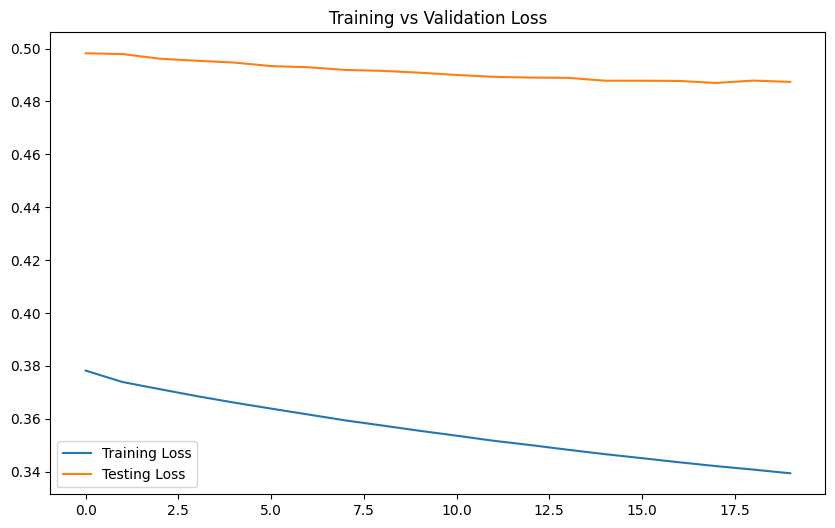

In [131]:
plt.figure(figsize = (10, 6))
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Testing Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

---
<font color=green>Q29: (3 Marks) </font>
<br><font color='green'>
Predict using the testing set and extract the residuals based on the methodology described in **[End-to-End Policy Learning of a Statistical Arbitrage Autoencoder Architecture](https://arxiv.org/pdf/2402.08233.pdf)**.
for 'NVDA' stock.
</font>

---

In [113]:
## Insert your code here

# Create the Encoder Model to extract features
encoder_model = Model(inputs=input_layer, outputs=encoder)

# Extract hidden factors from the testing set
hidden_factors_test = encoder_model.predict(Z_test)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [115]:
print("Shape of the hidden factors matrix for testing set:", hidden_factors_test.shape)

Shape of the hidden factors matrix for testing set: (76, 20)


In [123]:
# Predict using the testing set
Z_test_pred = autoencoder.predict(Z_test)

# Extract residuals
residuals = Z_test - Z_test_pred

NVDA_Index = Z_hat.columns.get_loc('NVDA') - 1 # Subtract 1 because we removed the date column
print(f"The Index Position for NVDA in the Z_train Array is: {NVDA_Index}")

# Replace index 0 with the actual index of NVDA in your dataset
nvda_residuals = residuals[:, NVDA_Index]

# Printing the residuals for NVDA
print(f"Residuals for NVDA stock:")
print(nvda_residuals)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step
The Index Position for NVDA in the Z_train Array is: 62
Residuals for NVDA stock:
[ 0.34155297 -0.7833928   0.0108102  -0.10931744  0.1657069   0.01949345
  0.38219443 -0.62877834 -0.7673051  -0.28416067  0.2692962   0.1451814
  0.04463986  0.11149155  0.44997776 -0.15898788  0.06042689  0.6788098
  0.86719143  1.2352531  -0.0418705   0.17463905 -0.22993243  0.1501735
  0.7764684  -0.04304376 -0.3502773   0.4222045  -0.431872   -0.558396
 -0.02112091  0.42697647  0.00512391  0.05642653  0.6595232  -0.33704555
 -0.04469478  0.74032915  1.4101777   0.00712377 -0.02922869 -1.0050666
  0.53124285  0.4993469   0.6051461  -0.04376304 -0.05874401  0.40790507
 -0.90631986 -0.4532547   2.1209567   0.53413475  0.03356263 -0.08152938
 -0.12662801  0.11261857  0.43623036  1.3177848   0.8437818   0.4552502
  0.5163158  -1.2263682  -0.36666766  1.415011   -0.00395823 -1.2193934
  0.5023036  -0.6137661   0.15522319 -0.5479321  -0.01480673  1.2222044
  0.67025614

<font color=green>Q30: (7 Marks) </font>
<br><font color='green'>
By reading carrefully the paper **[End-to-End Policy Learning of a Statistical Arbitrage Autoencoder Architecture](https://arxiv.org/pdf/2402.08233.pdf)**, answers the following question:
1. **Summarize the Key Actions**: Highlight the main experiments and methodologies employed by the authors in Section 5.
2. **Reproduction Steps**: Detail the necessary steps required to replicate the authors' approach based on the descriptions provided in the paper.
3. **Proposed Improvement**: Suggest one potential enhancement to the methodology that could potentially increase the effectiveness or efficiency of the model.



**Write your answers here:**








